In [ ]:
import sys
!{sys.executable} -m pip install tensorflow

     |████████████████████████████████| 244.3 MB 5.1 kB/s  eta 0:00:01     |███████████████████████████▎    | 207.9 MB 8.2 MB/s eta 0:00:05
     |████████████████████████████████| 124 kB 25.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.3 MB/s  eta 0:00:01
     |████████████████████████████████| 1.6 MB 23.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 23.7 MB/s eta 0:00:01
     |████████████████████████████████| 439 kB 21.4 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 9.5 MB/s  eta 0:00:01
     |████████████████████████████████| 13.2 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 27.2 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 16.3 MB/s eta 0:00:01


In [ ]:
from datetime import datetime, timedelta
import requests
import pandas as pd
import yfinance as yf

In [ ]:
companie = yf.Ticker("AMZN")
stock = companie.history(
    start=("2017-12-08"),
    end= ("2022-12-08"),
    #interval='60m'
).reset_index()
print(stock)

                          Date       Open       High        Low      Close  \
0    2017-12-08 00:00:00-05:00  58.520000  58.639500  57.855000  58.099998   
1    2017-12-11 00:00:00-05:00  58.230000  58.494999  57.849998  58.445999   
2    2017-12-12 00:00:00-05:00  58.325500  58.680000  58.080502  58.254002   
3    2017-12-13 00:00:00-05:00  58.500000  58.543499  58.013500  58.206501   
4    2017-12-14 00:00:00-05:00  58.185501  58.896500  58.122501  58.713001   
...                        ...        ...        ...        ...        ...   
1253 2022-12-01 00:00:00-05:00  96.989998  97.230003  94.919998  95.500000   
1254 2022-12-02 00:00:00-05:00  94.480003  95.360001  93.779999  94.129997   
1255 2022-12-05 00:00:00-05:00  93.050003  94.059998  90.820000  91.010002   
1256 2022-12-06 00:00:00-05:00  90.500000  91.040001  87.900002  88.250000   
1257 2022-12-07 00:00:00-05:00  88.339996  89.889999  87.480003  88.459999   

        Volume  Dividends  Stock Splits  
0     61002000       

In [ ]:
import math
close_prices = stock['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)
close_prices

0       58.099998
1       58.445999
2       58.254002
3       58.206501
4       58.713001
          ...    
1253    95.500000
1254    94.129997
1255    91.010002
1256    88.250000
1257    88.459999
Name: Close, Length: 1258, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

In [ ]:
train_data

In [ ]:
import numpy as np
x_train = []
y_train = []
timestep = 60
for i in range(timestep, len(train_data)):
    x_train.append(train_data[i-timestep:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(947, 60, 1)

In [ ]:
test_data = scaled_data[training_data_len-timestep: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(timestep, len(test_data)):
  x_test.append(test_data[i-timestep:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_test.shape

(251, 60, 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-12-12 00:43:23.074707: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
947/947 [==============================] - 24s 22ms/step - loss: 0.0043
Epoch 2/3
947/947 [==============================] - 26s 27ms/step - loss: 0.0017
Epoch 3/3
947/947 [==============================] - 25s 26ms/step - loss: 0.0014


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

8/8 [==============================] - 1s 27ms/step


0.18265506090870892

/var/folders/37/vv3b018n5kd41f34vt2k0ydm0000gq/T/ipykernel_37260/3333808840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


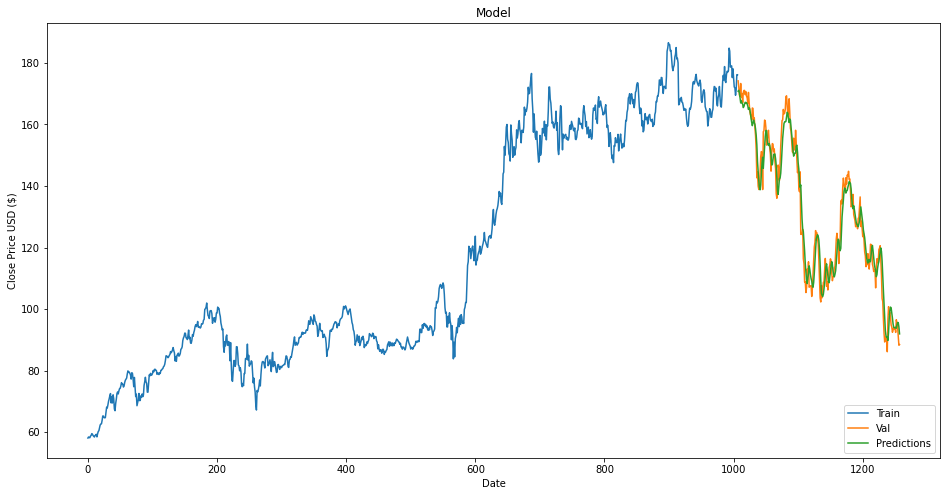

In [ ]:
data = stock.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()